# **DataCamp.Course_050_Cleaning Data in Python**

### **Course Description**

It's commonly said that data scientists spend 80% of their time cleaning and manipulating data and only 20% of their time analyzing it. The time spent cleaning is vital since analyzing dirty data can lead you to draw inaccurate conclusions. Data cleaning is an essential task in data science. Without properly cleaned data, the results of any data analysis or machine learning model could be inaccurate. In this course, you will learn how to identify, diagnose, and treat a variety of data cleaning problems in Python, ranging from simple to advanced. You will deal with improper data types, check that your data is in the correct range, handle missing data, perform record linkage, and more! 

In [1]:
# read_csv function

import os
import pandas as pd
folder_name = 'datasets'
dir = r'G:\My Drive\Data Science\Datacamp_Notebook\Datacamp_Notebook\{}'.format(folder_name)

def read_csv_fun(folder_name,file_name, path):
    path = dir
    os.chdir(path)
    df = pd.read_csv('{}.csv'.format(file_name), sep=',', low_memory=False, on_bad_lines='skip')
    return df

df_show = read_csv_fun('datasets','daily_show_guests_cleaned', dir)
print(df_show.head(5))

   YEAR GoogleKnowlege_Occupation     Show   Group    Raw_Guest_List
0  1999                     actor  1/11/99  Acting    Michael J. Fox
1  1999                  Comedian  1/12/99  Comedy   Sandra Bernhard
2  1999        television actress  1/13/99  Acting     Tracey Ullman
3  1999              film actress  1/14/99  Acting  Gillian Anderson
4  1999                     actor  1/18/99  Acting  David Alan Grier


## **Common data problems (Module 01-050)**

#### **Data type constraints**

1. Course outline

1 - Diagnose dirty data
2 - Side effects of dirty data
3 - Clean data

2. Why do we need to clean data?

Data sciece workflow:

Access Data --> Explore and process Data --> Extract Insights --> Report insights

Dirty data can appear because of *duplicate values*, *mis-spellings*, *data type parsing errors* and *legacy systems* issues.

**Whithout making sure that data is properly cleaned in the exploration and proccesing phase, we will surely compromise the insights and reports subsequently generated.**

3. Data type constraints

Datatype                Example                                 Python data type
Text data               First name, last name, address...       str
Integers                # Subscribers, # products sold...       int
Decimals                Temperature, $ exchange rates...        float
Binary                  Is married, new customer,yes/no, ...    bool
Dates                   Order dates, ship dates ...             datetime
Categories              Marriage status, gender ...             category

4. Strings to integers

*-# Import CSV file and output header*
sales = pd.read_csv('sales.csv')
sales.head(2)

`SalesOrderID Revenue Quantity`
`0 43659 23153$ 12`
`1 43660 1457$ 2`

*-# Get data types of columns*
sales.dtypes

`SalesOrderID int64`
`Revenue object`
`Quantity int64`
`dtype: object`

5. String to integers

*-# Get DataFrame information*
sales.info()

`<class 'pandas.core.frame.DataFrame'>`
`RangeIndex: 31465 entries, 0 to 31464`
`Data columns (total 3 columns):`
`SalesOrderID 31465 non-null int64`
`Revenue 31465 non-null object`
`Quantity 31465 non-null int64`
`dtypes: int64(2), object(1)`
`memory usage: 737.5+ KB`

*-# Print sum of all Revenue column*
sales['Revenue'].sum()

`'23153$1457$36865$32474$472$27510$16158$5694$6876$40487$807$6893$9153$6895$4216..`

*-# Remove $ from Revenue column*
sales['Revenue'] = sales['Revenue'].str.strip('$')
sales['Revenue'] = sales['Revenue'].astype('int')

*-# Verify that Revenue is now an integer*
assert sales['Revenue'].dtype == 'int'

6. The assert statement

*-# This will pass*
assert 1+1 == 2

*-# This will not pass*
assert 1+1 == 3

`AssertionError Traceback (most recent call last)`
`assert 1+1 == 3`
`AssertionError:`

7. Numeric or categorical?

`... marriage_status ...`
`... 3 ...`
`... 1 ...`
`... 2 ...`

0 = Never married 1 = Married 2 = Separated 3 = Divorced

df['marriage_status'].describe()

`marriage_status`
`...`
`mean 1.4`
`std 0.20`
`min 0.00`
`50% 1.8 ...`

*-# Convert to categorical*
df["marriage_status"] = df["marriage_status"].astype('category')
df.describe()

`marriage_status`
`count 241`
`unique 4`
`top 1`
`freq 120`

**Common data types**

Manipulating and analyzing data with incorrect data types could lead to compromised analysis as you go along the data science workflow.

When working with new data, you should always check the data types of your columns using the .dtypes attribute or the .info() method which you'll see in the next exercise. Often times, you'll run into columns that should be converted to different data types before starting any analysis.

In this exercise, you'll first identify different types of data and correctly map them to their respective types.

**Numeric data or ... ?**

In this exercise, and throughout this chapter, you'll be working with bicycle ride sharing data in San Francisco called `ride_sharing`. It contains information on the start and end stations, the trip duration, and some user information for a bike sharing service.

The `user_type` column contains information on whether a user is taking a free ride and takes on the following values:

    1 for free riders.
    2 for pay per ride.
    3 for monthly subscribers.

In this instance, you will print the information of `ride_sharing` using .`info()` and see a firsthand example of how an incorrect data type can flaw your analysis of the dataset. The `pandas` package is imported as `pd`.

STEP01
    Print the information of ride_sharing.
    Use .describe() to print the summary statistics of the user_type column from ride_sharing.
STEP02
Question

By looking at the summary statistics - they don't really seem to offer much description on how users are distributed along their purchase type, why do you think that is?

r:     The user_type column has an finite set of possible values that represent groupings of data, it should be converted to category.

STEP03
    Convert user_type into categorical by assigning it the 'category' data type and store it in the user_type_cat column.
    Make sure you converted user_type_cat correctly by using an assert statement.

In [4]:
ride_sharing = read_csv_fun('datasets','ride_sharing_new', dir)

# Print the information of ride_sharing
print(ride_sharing.info())

# Print summary statistics of user_type column
print(ride_sharing['user_type'].describe())

# Convert user_type from integer to category
ride_sharing['user_type_cat'] = ride_sharing['user_type'].astype('category')

# Write an assert statement confirming the change
assert ride_sharing['user_type_cat'].dtype == 'category'

# Print new summary statistics 
print(ride_sharing['user_type_cat'].describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25760 entries, 0 to 25759
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Unnamed: 0       25760 non-null  int64 
 1   duration         25760 non-null  object
 2   station_A_id     25760 non-null  int64 
 3   station_A_name   25760 non-null  object
 4   station_B_id     25760 non-null  int64 
 5   station_B_name   25760 non-null  object
 6   bike_id          25760 non-null  int64 
 7   user_type        25760 non-null  int64 
 8   user_birth_year  25760 non-null  int64 
 9   user_gender      25760 non-null  object
dtypes: int64(6), object(4)
memory usage: 2.0+ MB
None
count    25760.000000
mean         2.008385
std          0.704541
min          1.000000
25%          2.000000
50%          2.000000
75%          3.000000
max          3.000000
Name: user_type, dtype: float64
count     25760
unique        3
top           2
freq      12972
Name: user_type_cat, dty

**Summing strings and concatenating numbers**

In the previous exercise, you were able to identify that `category` is the correct data type for `user_type` and convert it in order to extract relevant statistical summaries that shed light on the distribution of `user_type`.

Another common data type problem is importing what should be numerical values as strings, as mathematical operations such as summing and multiplication lead to string concatenation, not numerical outputs.

In this exercise, you'll be converting the string column `duration` to the type `int`. Before that however, you will need to make sure to strip "`minutes`" from the column in order to make sure `pandas` reads it as numerical. The `pandas` package has been imported as `pd`.

STEPS
    Use the .strip() method to strip duration of "minutes" and store it in the duration_trim column.
    Convert duration_trim to int and store it in the duration_time column.
    Write an assert statement that checks if duration_time's data type is now an int.
    Print the average ride duration.

In [5]:
ride_sharing.head()

,Unnamed: 0,duration,station_A_id,station_A_name,station_B_id,station_B_name,bike_id,user_type,user_birth_year,user_gender,user_type_cat
0,0,12 minutes,81,Berry St at 4th St,323,Broadway at Kearny,5480,2,1959,Male,2
1,1,24 minutes,3,Powell St BART Station (Market St at 4th St),118,Eureka Valley Recreation Center,5193,2,1965,Male,2
2,2,8 minutes,67,San Francisco Caltrain Station 2 (Townsend St...,23,The Embarcadero at Steuart St,3652,3,1993,Male,3
3,3,4 minutes,16,Steuart St at Market St,28,The Embarcadero at Bryant St,1883,1,1979,Male,1
4,4,11 minutes,22,Howard St at Beale St,350,8th St at Brannan St,4626,2,1994,Male,2


In [6]:
# Strip duration of minutes
ride_sharing['duration_trim'] = ride_sharing['duration'].str.strip("minutes")

# Convert duration to integer
ride_sharing['duration_time'] = ride_sharing['duration_trim'].astype('int')

# Write an assert statement making sure of conversion
assert ride_sharing['duration_time'].dtype == 'int'

# Print formed columns and calculate average ride duration 
print(ride_sharing[['duration','duration_trim','duration_time']])
print(ride_sharing['duration_time'].mean())

         duration duration_trim  duration_time
0      12 minutes           12              12
1      24 minutes           24              24
2       8 minutes            8               8
3       4 minutes            4               4
4      11 minutes           11              11
...           ...           ...            ...
25755  11 minutes           11              11
25756  10 minutes           10              10
25757  14 minutes           14              14
25758  14 minutes           14              14
25759  29 minutes           29              29

[25760 rows x 3 columns]
11.389052795031056


#### **Data range constraints**

1. Motivation

- movies.head()

import matplotlib.pyplot as plt
plt.hist(movies['avg_rating'])
plt.title('Average rating of movies (1-5)')

*a average rating of 6! Out of range!*

- Can future sign-ups exist?
*-# Import date time*
import datetime as dt
today_date = dt.date.today()
user_signups[user_signups['subscription_date'] > dt.date.today()]

*a future signup, can not be possible!*

2. How to deal with out of range data?
Dropping data
Setting custom minimums and maximums
Treat as missing and impute
Setting custom value depending on business assumptions

3. Movie example

import pandas as pd
*-# Output Movies with rating > 5*
movies[movies['avg_rating'] > 5]

`movie_name avg_rating`
`23 A Beautiful Mind 6`
`65 La Vita e Bella 6`
`77 Amelie 6`

*-# Drop values using filtering*
movies = movies[movies['avg_rating'] <= 5]

*-# Drop values using .drop()*
movies.drop(movies[movies['avg_rating'] > 5].index, inplace = True)
*-# Assert results*
assert movies['avg_rating'].max() <= 5

*-# Convert avg_rating > 5 to 5*
movies.loc[movies['avg_rating'] > 5, 'avg_rating'] = 5
*-# Assert statement*
assert movies['avg_rating'].max() <= 5

*Remember, no output means it passed*

4. Date range example

import datetime as dt
import pandas as pd
*-# Output data types*
user_signups.dtypes

`subscription_date object`
`user_name objec`t
`Country object`
`dtype: object`

*-# Convert to date*
user_signups['subscription_date'] = pd.to_datetime(user_signups['subscription_date']).dt.date
*-# Save today's date*
today_date = dt.date.today()

- Drop the data
*-# Drop values using filtering*
user_signups = user_signups[user_signups['subscription_date'] < today_date]
*-# Drop values using .drop()*
user_signups.drop(user_signups[user_signups['subscription_date'] > today_date].index, inplace = True)

- Hardcode dates with upper limit
*-#  Set all in the future to today's date*
user_signups.loc[user_signups['subscription_date'] > today_date, 'subscription_date'] = today_date
*-# Assert is true*
assert user_signups.subscription_date.max().date() <= today_date

**Tire size constraints**

In this lesson, you're going to build on top of the work you've been doing with the `ride_sharing` DataFrame. You'll be working with the `tire_sizes` column which contains data on each bike's tire size.

Bicycle tire sizes could be either 26″, 27″ or 29″ and are here correctly stored as a categorical value. In an effort to cut maintenance costs, the ride sharing provider decided to set the maximum tire size to be 27″.

In this exercise, you will make sure the `tire_sizes` column has the correct range by first converting it to an integer, then setting and testing the new upper limit of 27″ for tire sizes.

STEPS
    Convert the tire_sizes column from category to 'int'.
    Use .loc[] to set all values of tire_sizes above 27 to 27.
    Reconvert back tire_sizes to 'category' from int.
    Print the description of the tire_sizes.

In [ ]:
# Convert tire_sizes to integer
ride_sharing['tire_sizes'] = ride_sharing['tire_sizes'].astype('int')

# Set all values above 27 to 27
ride_sharing.loc[ride_sharing['tire_sizes'] > 27, 'tire_sizes'] = 27

# Reconvert tire_sizes back to categorical
ride_sharing['tire_sizes'] = ride_sharing['tire_sizes'].astype('category')

# Print tire size description
print(ride_sharing['tire_sizes'].describe())

**Back to the future**

A new update to the data pipeline feeding into the `ride_sharing` DataFrame has been updated to register each ride's date. This information is stored in the `ride_date` column of the type `object`, which represents strings in `pandas`.

A bug was discovered which was relaying rides taken today as taken next year. To fix this, you will find all instances of the `ride_date` column that occur anytime in the future, and set the maximum possible value of this column to today's date. Before doing so, you would need to convert `ride_date` to a `datetime` object.

The `datetime` package has been imported as `dt`, alongside all the packages you've been using till now.

STEPS
    Convert ride_date to a datetime object using to_datetime(), then convert the datetime object into a date and store it in ride_dt column.
    Create the variable today, which stores today's date by using the dt.date.today() function.
    For all instances of ride_dt in the future, set them to today's date.
    Print the maximum date in the ride_dt column.

In [ ]:
import datetime as dt
import pandas as pd

# Convert ride_date to date
ride_sharing['ride_dt'] = pd.to_datetime(ride_sharing['ride_date']).dt.date

# Save today's date
today = dt.date.today()

# Set all in the future to today's date
ride_sharing.loc[ride_sharing['ride_dt'] > today, 'ride_dt'] = today

# Print maximum of ride_dt column
print(ride_sharing['ride_dt'].max())

#### **Uniqueness constraints**

1. What are duplicate values?
All columns have the same values
Most columns have the same values

2. Why do they happen?
Data Entry & Human Error
Bugs and design errors
Join ir merge errors

3. How to find duplicate values?
*-# Print the header*
height_weight.head()

*-# Get duplicates across all columns*
duplicates = height_weight.duplicated()
print(duplicates)

*-# Get duplicate rows*
duplicates = height_weight.duplicated()
height_weight[duplicates]

4. How to find duplicate rows?

- The .duplicated() method
subset : List of column names to check for duplication.
keep : Whether to keep first ( 'first' ), last ( 'last' ) or all ( False ) duplicate values.

*-# Column names to check for duplication*
column_names = ['first_name','last_name','address']
duplicates = height_weight.duplicated(subset = column_names, keep = False)

*-# Output duplicate values*
height_weight[duplicates]

*-# Output duplicate values in order*
height_weight[duplicates].sort_values(by = 'first_name')

5. How to treat duplicate values?

- The .drop_duplicates() method
subset : List of column names to check for duplication.
keep : Whether to keep first ( 'first' ), last ( 'last' ) or all ( False ) duplicate values.
inplace : Drop duplicated rows directly inside DataFrame without creating new object ( True ).

*-# Drop duplicates*
height_weight.drop_duplicates(inplace = True)

*-# Output duplicate values*
column_names = ['first_name','last_name','address']
duplicates = height_weight.duplicated(subset = column_names, keep = False)
height_weight[duplicates].sort_values(by = 'first_name')

- The .groupby() and .agg() methods

*-# Group by column names and produce statistical summaries*
column_names = ['first_name','last_name','address']
summaries = {'height': 'max', 'weight': 'mean'}
height_weight = height_weight.groupby(by = column_names).agg(summaries).reset_index()

*-# Make sure aggregation is done*
duplicates = height_weight.duplicated(subset = column_names, keep = False)
height_weight[duplicates].sort_values(by = 'first_name')

`[]`

**Finding duplicates**

A new update to the data pipeline feeding into `ride_sharing` has added the `ride_id` column, which represents a unique identifier for each ride.

The update however coincided with radically shorter average ride duration times and irregular user birth dates set in the future. Most importantly, the number of rides taken has increased by 20% overnight, leading you to think there might be both complete and incomplete duplicates in the `ride_sharing` DataFrame.

In this exercise, you will confirm this suspicion by finding those duplicates. A sample of `ride_sharing` is in your environment, as well as all the packages you've been working with thus far.

STEPS
    Find duplicated rows of ride_id in the ride_sharing DataFrame while setting keep to False.
    Subset ride_sharing on duplicates and sort by ride_id and assign the results to duplicated_rides.
    Print the ride_id, duration and user_birth_year columns of duplicated_rides in that order.

In [ ]:
# Find duplicates
duplicates = ride_sharing.duplicated(subset = 'ride_id', keep = False)

# Sort your duplicated rides
duplicated_rides = ride_sharing[duplicates].sort_values('ride_id')

# Print relevant columns of duplicated_rides
print(duplicated_rides[['ride_id','duration','user_birth_year']])

In [10]:
# Find duplicates
duplicates = ride_sharing.duplicated(subset = 'bike_id', keep = False)

# Sort your duplicated rides
duplicated_rides = ride_sharing[duplicates].sort_values('bike_id')

# Print relevant columns of duplicated_rides
print(duplicated_rides[['bike_id','duration','user_birth_year']])

       bike_id    duration  user_birth_year
3638        11  12 minutes             1988
6088        11   5 minutes             1985
10857       11   4 minutes             1987
10045       27  13 minutes             1989
16104       27  10 minutes             1970
...        ...         ...              ...
8812      6638  10 minutes             1986
6815      6638   5 minutes             1995
8456      6638   7 minutes             1983
8300      6638   6 minutes             1962
8380      6638   8 minutes             1984

[25717 rows x 3 columns]


**Treating duplicates**

In the last exercise, you were able to verify that the new update feeding into `ride_sharing` contains a bug generating both complete and incomplete duplicated rows for some values of the `ride_id` column, with occasional discrepant values for the `user_birth_year` and `duration` columns.

In this exercise, you will be treating those duplicated rows by first dropping complete duplicates, and then merging the incomplete duplicate rows into one while keeping the average `duration`, and the minimum `user_birth_year` for each set of incomplete duplicate rows.

STEPS
    Drop complete duplicates in ride_sharing and store the results in ride_dup.
    Create the statistics dictionary which holds minimum aggregation for user_birth_year and mean aggregation for duration.
    Drop incomplete duplicates by grouping by ride_id and applying the aggregation in statistics.
    Find duplicates again and run the assert statement to verify de-duplication.

In [14]:
# Drop complete duplicates from ride_sharing
ride_dup = ride_sharing.drop_duplicates()

# Create statistics dictionary for aggregation function
statistics = {'user_birth_year': 'min', 'duration_time': 'mean'}

# Group by ride_id and compute new statistics
ride_unique = ride_dup.groupby('bike_id').agg(statistics).reset_index()

# Find duplicated values again
duplicates = ride_unique.duplicated(subset = 'bike_id', keep = False)
duplicated_rides = ride_unique[duplicates == True]

# Assert duplicates are processed
assert duplicated_rides.shape[0] == 0

print(duplicated_rides)

Empty DataFrame
Columns: [bike_id, user_birth_year, duration_time]
Index: []


In [ ]:
# Drop complete duplicates from ride_sharing
ride_dup = ride_sharing.drop_duplicates()

# Create statistics dictionary for aggregation function
statistics = {'user_birth_year': 'min', 'duration_time': 'mean'}

# Group by ride_id and compute new statistics
ride_unique = ride_dup.groupby('ride_id').agg(statistics).reset_index()

# Find duplicated values again
duplicates = ride_unique.duplicated(subset = 'ride_id', keep = False)
duplicated_rides = ride_unique[duplicates == True]

# Assert duplicates are processed
assert duplicated_rides.shape[0] == 0

## **Text and categorical data problems (Module 02-050)**

#### **Membership constraints**

1. Categories and membership constraints
Predefinied finite set of categories

Type of data                Example values              Numeric representation
Marriage Status             unmarried , married         0 , 1
Household Income Category   0-20K , 20-40K , ...        0 , 1 , ..
Loan Status                 default , payed , no_loan   0 , 1 , 2

*Marriage status can only be unmarried _or_ married*

2. Why could we have these problems?
Data entry errors
Parsign errors (database)

3. How do we treat these problems?

- Dropping data
- Remaping Categories
- Infering Categories

4. An example
*-# Read study data and print it*
study_data = pd.read_csv('study.csv') 
study_data

*-# Correct possible blood types*
categories

5. A note on joins
- Anti Joins
- Inner Joins

6. A left anti join on blood types
Returns only rows with incorrect blood type (z+)

7. An inner join on blood types
Returns all the rows except those containing z+

8. Finding inconsistent categories

inconsistent_categories = set(study_data['blood_type']).difference(categories['blood_type'])
print(inconsistent_categories)

`{'Z+'}`

*-# Get and print rows with inconsistent categories*
inconsistent_rows = study_data['blood_type'].isin(inconsistent_categories)
study_data[inconsistent_rows]

`name birthday blood_type`
`5 Jennifer 2019-12-17 Z+`

9. Dropping inconsistent categories

inconsistent_categories = set(study_data['blood_type']).difference(categories['blood_type'])
inconsistent_rows = study_data['blood_type'].isin(inconsistent_categories)
inconsistent_data = study_data[inconsistent_rows]

*-# Drop inconsistent categories and get consistent data only*
consistent_data = study_data[~inconsistent_rows]

`name birthday blood_type`
`1 Beth 2019-10-20 B-`
`2 Ignatius 2020-07-08 A-`
`3 Paul 2019-08-12 O+`
`4 Helen 2019-03-17 O-`
`... ... ... ...`

**Finding consistency**

In this exercise and throughout this chapter, you'll be working with the `airlines` DataFrame which contains survey responses on the San Francisco Airport from airline customers.

The DataFrame contains flight metadata such as the airline, the destination, waiting times as well as answers to key questions regarding cleanliness, safety, and satisfaction. Another DataFrame named `categories` was created, containing all correct possible values for the survey columns.

In this exercise, you will use both of these DataFrames to find survey answers with inconsistent values, and drop them, effectively performing an outer and inner join on both these DataFrames as seen in the video exercise. The `pandas` package has been imported as `pd`, and the `airlines` and `categories` DataFrames are in your environment.

STEP01
    Print the categories DataFrame and take a close look at all possible correct categories of the survey columns.
    Print the unique values of the survey columns in airlines using the .unique() method.
STEP02
Question

Take a look at the output. Out of the cleanliness, safety and satisfaction columns, which one has an inconsistent category and what is it?

*cleanliness because it has an Unacceptable category.*
STEP03
    Create a set out of the cleanliness column in airlines using set() and find the inconsistent category by finding the difference in the cleanliness column of categories.
    Find rows of airlines with a cleanliness value not in categories and print the output.
STEP04
    Print the rows with the consistent categories of cleanliness only.

In [38]:
airlines = read_csv_fun('datasets','airlines_final', dir)

import pandas as pd

# Create the pandas DataFrame with category information
data = {
    'cleanliness': ['Clean', 'Average', 'Somewhat clean', 'Somewhat dirty', 'Dirty'],
    'safety': ['Neutral', 'Very safe', 'Somewhat safe', 'Very unsafe', 'Somewhat unsafe'],
    'satisfaction': ['Very satisfied', 'Neutral', 'Somewhat satisfied', 'Somewhat unsatisfied', 'Very unsatisfied']
}

categories = pd.DataFrame(data)

display(airlines.head(), categories)

,Unnamed: 0,id,day,airline,destination,dest_region,dest_size,boarding_area,dept_time,wait_min,cleanliness,safety,satisfaction
0,0,1351,Tuesday,UNITED INTL,KANSAI,Asia,Hub,Gates 91-102,2018-12-31,115.0,Clean,Neutral,Very satisfied
1,1,373,Friday,ALASKA,SAN JOSE DEL CABO,Canada/Mexico,Small,Gates 50-59,2018-12-31,135.0,Clean,Very safe,Very satisfied
2,2,2820,Thursday,DELTA,LOS ANGELES,West US,Hub,Gates 40-48,2018-12-31,70.0,Average,Somewhat safe,Neutral
3,3,1157,Tuesday,SOUTHWEST,LOS ANGELES,West US,Hub,Gates 20-39,2018-12-31,190.0,Clean,Very safe,Somewhat satsified
4,4,2992,Wednesday,AMERICAN,MIAMI,East US,Hub,Gates 50-59,2018-12-31,559.0,Somewhat clean,Very safe,Somewhat satsified


,cleanliness,safety,satisfaction
0,Clean,Neutral,Very satisfied
1,Average,Very safe,Neutral
2,Somewhat clean,Somewhat safe,Somewhat satisfied
3,Somewhat dirty,Very unsafe,Somewhat unsatisfied
4,Dirty,Somewhat unsafe,Very unsatisfied


In [44]:
import numpy as np

#corrupt data
id_corrupted = [2992, 2913, 2321]
corrupt_con_1 = airlines['id'].isin(id_corrupted)
display(airlines[corrupt_con_1])

airlines['cleanliness'] = np.where(corrupt_con_1,'Unacceptable',airlines['cleanliness'])
display(airlines)

,Unnamed: 0,id,day,airline,destination,dest_region,dest_size,boarding_area,dept_time,wait_min,cleanliness,safety,satisfaction
4,4,2992,Wednesday,AMERICAN,MIAMI,East US,Hub,Gates 50-59,2018-12-31,559.0,Unacceptable,Very safe,Somewhat satsified
17,18,2913,Friday,TURKISH AIRLINES,ISTANBUL,Middle East,Hub,Gates 91-102,2018-12-31,225.0,Unacceptable,Very safe,Somewhat satsified
89,100,2321,Wednesday,SOUTHWEST,LOS ANGELES,West US,Hub,Gates 20-39,2018-12-31,130.0,Unacceptable,Somewhat safe,Somewhat satsified


,Unnamed: 0,id,day,airline,destination,dest_region,dest_size,boarding_area,dept_time,wait_min,cleanliness,safety,satisfaction
0,0,1351,Tuesday,UNITED INTL,KANSAI,Asia,Hub,Gates 91-102,2018-12-31,115.0,Clean,Neutral,Very satisfied
1,1,373,Friday,ALASKA,SAN JOSE DEL CABO,Canada/Mexico,Small,Gates 50-59,2018-12-31,135.0,Clean,Very safe,Very satisfied
2,2,2820,Thursday,DELTA,LOS ANGELES,West US,Hub,Gates 40-48,2018-12-31,70.0,Average,Somewhat safe,Neutral
3,3,1157,Tuesday,SOUTHWEST,LOS ANGELES,West US,Hub,Gates 20-39,2018-12-31,190.0,Clean,Very safe,Somewhat satsified
4,4,2992,Wednesday,AMERICAN,MIAMI,East US,Hub,Gates 50-59,2018-12-31,559.0,Unacceptable,Very safe,Somewhat satsified
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2472,2804,1475,Tuesday,ALASKA,NEW YORK-JFK,East US,Hub,Gates 50-59,2018-12-31,280.0,Somewhat clean,Neutral,Somewhat satsified
2473,2805,2222,Thursday,SOUTHWEST,PHOENIX,West US,Hub,Gates 20-39,2018-12-31,165.0,Clean,Very safe,Very satisfied
2474,2806,2684,Friday,UNITED,ORLANDO,East US,Hub,Gates 70-90,2018-12-31,92.0,Clean,Very safe,Very satisfied
2475,2807,2549,Tuesday,JETBLUE,LONG BEACH,West US,Small,Gates 1-12,2018-12-31,95.0,Clean,Somewhat safe,Very satisfied


In [45]:
# Print categories DataFrame
print(categories)

# Print unique values of survey columns in airlines
print('Cleanliness: ', airlines['cleanliness'].unique(), "\n")
print('Safety: ', airlines['safety'].unique(), "\n")
print('Satisfaction: ', airlines['satisfaction'].unique(), "\n")

      cleanliness           safety          satisfaction
0           Clean          Neutral        Very satisfied
1         Average        Very safe               Neutral
2  Somewhat clean    Somewhat safe    Somewhat satisfied
3  Somewhat dirty      Very unsafe  Somewhat unsatisfied
4           Dirty  Somewhat unsafe      Very unsatisfied
Cleanliness:  ['Clean' 'Average' 'Unacceptable' 'Somewhat clean' 'Somewhat dirty'
 'Dirty'] 

Safety:  ['Neutral' 'Very safe' 'Somewhat safe' 'Very unsafe' 'Somewhat unsafe'] 

Satisfaction:  ['Very satisfied' 'Neutral' 'Somewhat satsified' 'Somewhat unsatisfied'
 'Very unsatisfied'] 



In [51]:
# Find the cleanliness category in airlines not in categories
cat_clean = set(airlines['cleanliness']).difference(categories['cleanliness'])

print(cat_clean)

# Find rows with that category
cat_clean_rows = airlines['cleanliness'].isin(cat_clean)

# Print rows with inconsistent category
display(airlines[cat_clean_rows])

# Print rows with consistent categories only
airlines_clean = airlines[~cat_clean_rows]

print(airlines_clean)
print('Cleanliness: ', airlines_clean['cleanliness'].unique(), "\n")

{'Unacceptable'}


,Unnamed: 0,id,day,airline,destination,dest_region,dest_size,boarding_area,dept_time,wait_min,cleanliness,safety,satisfaction
4,4,2992,Wednesday,AMERICAN,MIAMI,East US,Hub,Gates 50-59,2018-12-31,559.0,Unacceptable,Very safe,Somewhat satsified
17,18,2913,Friday,TURKISH AIRLINES,ISTANBUL,Middle East,Hub,Gates 91-102,2018-12-31,225.0,Unacceptable,Very safe,Somewhat satsified
89,100,2321,Wednesday,SOUTHWEST,LOS ANGELES,West US,Hub,Gates 20-39,2018-12-31,130.0,Unacceptable,Somewhat safe,Somewhat satsified


      Unnamed: 0    id       day        airline        destination  \
0              0  1351   Tuesday    UNITED INTL             KANSAI   
1              1   373    Friday         ALASKA  SAN JOSE DEL CABO   
2              2  2820  Thursday          DELTA        LOS ANGELES   
3              3  1157   Tuesday      SOUTHWEST        LOS ANGELES   
5              5   634  Thursday         ALASKA             NEWARK   
...          ...   ...       ...            ...                ...   
2472        2804  1475   Tuesday         ALASKA       NEW YORK-JFK   
2473        2805  2222  Thursday      SOUTHWEST            PHOENIX   
2474        2806  2684    Friday         UNITED            ORLANDO   
2475        2807  2549   Tuesday        JETBLUE         LONG BEACH   
2476        2808  2162  Saturday  CHINA EASTERN            QINGDAO   

        dest_region dest_size boarding_area   dept_time  wait_min  \
0              Asia       Hub  Gates 91-102  2018-12-31     115.0   
1     Canada/Mexico  

#### **Categorical variables**

1. What type of errors could we have?

I) Value inconsistency
    Inconsistent fields: 'married' , 'Maried' , 'UNMARRIED' , 'not married' ..
    _Trailing white spaces: _ 'married ' , ' married ' ..

II) Collapsing too many categories to few
    Creating new groups: 0-20K , 20-40K categories ... from continuous household income data
    Mapping groups to new ones: Mapping household income categories to 2 'rich' , 'poor'

III) Making sure data is of type category (seen in Chapter 1)

2. Value consistency

- Capitalization: 'married' , 'Married' , 'UNMARRIED' , 'unmarried' ..

*-# Get marriage status column*
marriage_status = demographics['marriage_status']
marriage_status.value_counts()

`unmarried 352`
`married 268`
`MARRIED 204`
`UNMARRIED 176`
`dtype: int64`

*-# Capitalize*
marriage_status['marriage_status'] = marriage_status['marriage_status'].str.upper()
marriage_status['marriage_status'].value_counts()

`UNMARRIED 528`
`MARRIED 472`

*-# Lowercase*
marriage_status['marriage_status'] = marriage_status['marriage_status'].str.lower()
marriage_status['marriage_status'].value_counts()

`unmarried 528`
`married 472`

- Trailing spaces: 'married ' , 'married' , 'unmarried' , ' unmarried' ..

*-# Get marriage status column*
marriage_status = demographics['marriage_status']
marriage_status.value_counts()

`unmarried 352`
`unmarried 268`
`married 204`
`married 176`
`dtype: int64`

*-# Strip all spaces*
demographics = demographics['marriage_status'].str.strip()
demographics['marriage_status'].value_counts()

`unmarried 528`
`married 472`

3. Collapsing data into categories

- Create categories out of data: income_group column from income column automatically.

*-# Using qcut()*
import pandas as pd
group_names = ['0-200K', '200K-500K', '500K+']
demographics['income_group'] = pd.qcut(demographics['household_income'], q = 3,
                                        labels = group_names)

*-# Print income_group column*
demographics[['income_group', 'household_income']]

`category household_income`
`0 200K-500K 189243`
`1 500K+ 778533`
`..`

- Create categories out of data: income_group column from income column having in count the range.

*-# Using cut() - create category ranges and names*
ranges = [0,200000,500000,np.inf]
group_names = ['0-200K', '200K-500K', '500K+']

*-# Create income group column*
demographics['income_group'] = pd.cut(demographics['household_income'], bins=ranges,
                                    labels=group_names)
demographics[['income_group', 'household_income']]

`category Income`
`0 0-200K 189243`
`1 500K+ 778533`

- Map categories to fewer ones: reducing categories in categorical column.
    operating_system column is: 'Microsoft', 'MacOS', 'IOS', 'Android', 'Linux'
    operating_system column should become: 'DesktopOS', 'MobileOS'

*-# Create mapping dictionary and replace*
mapping = {'Microsoft':'DesktopOS', 
            'MacOS':'DesktopOS', 
            'Linux':'DesktopOS', 
            'IOS':'MobileOS', 
            'Android':'MobileOS'}

devices['operating_system'] = devices['operating_system'].replace(mapping)
devices['operating_system'].unique()

`array(['DesktopOS', 'MobileOS'], dtype=object)`

**Inconsistent categories**

In this exercise, you'll be revisiting the `airlines` DataFrame from the previous lesson.

As a reminder, the DataFrame contains flight metadata such as the airline, the destination, waiting times as well as answers to key questions regarding cleanliness, safety, and satisfaction on the San Francisco Airport.

In this exercise, you will examine two categorical columns from this DataFrame, `dest_region` and `dest_size` respectively, assess how to address them and make sure that they are cleaned and ready for analysis. The `pandas` package has been imported as `pd`, and the `airlines` DataFrame is in your environment.

STEP01
    Print the unique values in dest_region and dest_size respectively.
STEP02
Question
From looking at the output, what do you think is the problem with these columns?
*The dest_region column has inconsistent values due to capitalization and has one value that needs to be remapped.*
*The dest_size column has only inconsistent values due to leading and trailing spaces.*
STEP03
    Change the capitalization of all values of dest_region to lowercase.
    Replace the 'eur' with 'europe' in dest_region using the .replace() method.
STEP04

In [54]:
# Print unique values of both columns
print(airlines['dest_region'].unique())
print(airlines['dest_size'].unique())

# Lower dest_region column and then replace "eur" with "europe"
airlines['dest_region'] = airlines['dest_region'].str.lower() 
airlines['dest_region'] = airlines['dest_region'].replace({'eur':'europe'})

# Remove white spaces from `dest_size`
airlines['dest_size'] = airlines['dest_size'].str.strip()

# Verify changes have been effected
print(airlines['dest_region'].unique())
print(airlines['dest_size'].unique())

['asia' 'canada/mexico' 'west us' 'east us' 'midwest us' 'middle east'
 'europe' 'central/south america' 'australia/new zealand']
['Hub' 'Small' '    Hub' 'Medium' 'Large' 'Hub     ' '    Small'
 'Medium     ' '    Medium' 'Small     ' '    Large' 'Large     ']
['asia' 'canada/mexico' 'west us' 'east us' 'midwest us' 'middle east'
 'europe' 'central/south america' 'australia/new zealand']
['Hub' 'Small' 'Medium' 'Large']


**Remapping categories**

To better understand survey respondents from `airlines`, you want to find out if there is a relationship between certain responses and the day of the week and wait time at the gate.

The `airlines` DataFrame contains the `day` and `wait_min` columns, which are categorical and numerical respectively. The `day` column contains the exact day a flight took place, and `wait_min` contains the amount of minutes it took travelers to wait at the gate. To make your analysis easier, you want to create two new categorical variables:

    wait_type: 'short' for 0-60 min, 'medium' for 60-180 and long for 180+
    day_week: 'weekday' if day is in the weekday, 'weekend' if day is in the weekend.

The `pandas` and `numpy` packages have been imported as `pd` and `np`. Let's create some new categorical data!

STEPS
    Create the ranges and labels for the wait_type column mentioned in the description.
    Create the wait_type column by from wait_min by using pd.cut(), while inputting label_ranges and label_names in the correct arguments.
    Create the mapping dictionary mapping weekdays to 'weekday' and weekend days to 'weekend'.
    Create the day_week column by using .replace().

In [56]:
# Create ranges for categories
label_ranges = [0, 60, 180 , np.inf]
label_names = ['short', 'medium', 'long']

# Create wait_type column
airlines['wait_type'] = pd.cut(airlines['wait_min'], bins = label_ranges, 
                                labels = label_names)

# Create mappings and replace
mappings = {'Monday':'weekday', 'Tuesday':'weekday', 'Wednesday': 'weekday', 
            'Thursday': 'weekday', 'Friday': 'weekday', 
            'Saturday': 'weekend', 'Sunday': 'weekend'}

airlines['day_week'] = airlines['day'].replace(mappings)

display(airlines.head())
print(airlines['wait_type'].unique())
print(airlines['day_week'].unique())

,Unnamed: 0,id,day,airline,destination,dest_region,dest_size,boarding_area,dept_time,wait_min,cleanliness,safety,satisfaction,wait_type,day_week
0,0,1351,Tuesday,UNITED INTL,KANSAI,asia,Hub,Gates 91-102,2018-12-31,115.0,Clean,Neutral,Very satisfied,medium,weekday
1,1,373,Friday,ALASKA,SAN JOSE DEL CABO,canada/mexico,Small,Gates 50-59,2018-12-31,135.0,Clean,Very safe,Very satisfied,medium,weekday
2,2,2820,Thursday,DELTA,LOS ANGELES,west us,Hub,Gates 40-48,2018-12-31,70.0,Average,Somewhat safe,Neutral,medium,weekday
3,3,1157,Tuesday,SOUTHWEST,LOS ANGELES,west us,Hub,Gates 20-39,2018-12-31,190.0,Clean,Very safe,Somewhat satsified,long,weekday
4,4,2992,Wednesday,AMERICAN,MIAMI,east us,Hub,Gates 50-59,2018-12-31,559.0,Unacceptable,Very safe,Somewhat satsified,long,weekday


['medium', 'long', 'short']
Categories (3, object): ['short' < 'medium' < 'long']
['weekday' 'weekend']


#### **Cleaning text data**

1. What is text data?

Type of data        Example values
Names               Alex , Sara ...
Phone numbers       +96171679912 ...
Emails              `adel@datacamp.com`..
Passwords           ...

- Common text data problems
1) Data inconsistency:
+96171679912 or 0096171679912 or ..?

2) Fixed length violations:
Passwords needs to be at least 8 characters

3) Typos:
+961.71.679912

2. Example
phones = pd.read_csv('phones.csv')
print(phones)

    Full name           Phone number
0   Noelani A. Gray     001-702-397-5143
1   Myles Z. Gomez      001-329-485-0540
2   Gil B. Silva        001-195-492-2338
3   Prescott D. Hardin  +1-297-996-4904     <-- Inconsistent data format
4   Benedict G. Valdez  001-969-820-3536
5   Reece M. Andrews    4138                <-- Length violation 
6   Hayfa E. Keith      001-536-175-8444
7   Hedley I. Logan     001-681-552-1823
8   Jack W. Carrillo    001-910-323-5265
9   Lionel M. Davis     001-143-119-9210

3. Fixing the phone number column

*-# Replace "+" with "00"*
phones["Phone number"] = phones["Phone number"].str.replace("+","00") 
phones

*-# Replace "-" with nothing*
phones["Phone number"] = phones["Phone number"].str.replace("-","") 
phones

*-# Replace phone numbers with lower than 10 digits to NaN*
digits = phones['Phone number'].str.len() 
phones.loc[digits <10,"Phone number"] = np.nan 
print(phones)

    Full name           Phone number 
0   Noelani A. Gray     0017023975143 
1   Myles Z. Gomez      0013294850540 
2   Gil B. Silva        0011954922338 
3   Prescott D. Hardin  0012979964904 
4   Benedict G. Valdez  0019698203536 
5   Reece M. Andrews    NaN 
6   Hayfa E. Keith      0015361758444 
7   Hedley I. Logan     0016815521823 
8   Jack W. Carrillo    0019103235265 
9   Lionel M. Davis     0011431199210

*-# Find length of each row in Phone number column*
sanity_check = phone['Phone number'].str.len()

*-# Assert minmum phone number length is 10*
assert sanity_check.min() >= 10

*-# Assert all numbers do not have "+" or "-"*
assert phone['Phone number'].str.contains("+|-").any() == False

**Remember, assert returns nothing if the condition passes**

4. But what about more complicated examples?
phones.head()
    Full name           Phone number
0   Olga Robinson       +(01706)-25891
1   Justina Kim         +0500-571437
2   Tamekah Henson      +0800-1111
3   Miranda Solis       +07058-879063
4   Caldwell Gilliam    +(016977)-8424

*Supercharged control + F*

5. Regular expressions in action
*-# Replace letters with nothing*
phones['Phone number'] = phones['Phone number'].str.replace(r'\D+', '')
phones.head()

    Full name           Phone number
0   Olga Robinson       0170625891
1   Justina Kim         0500571437
2   Tamekah Henson      08001111
3   Miranda Solis       07058879063
4   Caldwell Gilliam    0169778424

**Removing titles and taking names**

While collecting survey respondent metadata in the `airlines` DataFrame, the full name of respondents was saved in the `full_name` column. However upon closer inspection, you found that a lot of the different names are prefixed by honorifics such as "`Dr`.", "`Mr`.", "`Ms`." and "`Miss`".

Your ultimate objective is to create two new columns named `first_name` and `last_name`, containing the first and last names of respondents respectively. Before doing so however, you need to remove honorifics.

The `airlines` DataFrame is in your environment, alongside `pandas` as `pd`.

STEPS
    Remove "Dr.", "Mr.", "Miss" and "Ms." from full_name by replacing them with an empty string "" in that order.
    Run the assert statement using .str.contains() that tests whether full_name still contains any of the honorifics.

In [ ]:
# Replace "Dr." with empty string ""
airlines['full_name'] = airlines['full_name'].str.replace("Dr.","")

# Replace "Mr." with empty string ""
airlines['full_name'] = airlines['full_name'].str.replace("Mr.","")

# Replace "Miss" with empty string ""
airlines['full_name'] = airlines['full_name'].str.replace("Miss","")

# Replace "Ms." with empty string ""
airlines['full_name'] = airlines['full_name'].str.replace("Ms.","")

# Assert that full_name has no honorifics
assert airlines['full_name'].str.contains('Ms.|Mr.|Miss|Dr.').any() == False

**Keeping it descriptive**

To further understand travelers' experiences in the San Francisco Airport, the quality assurance department sent out a qualitative questionnaire to all travelers who gave the airport the worst score on all possible categories. The objective behind this questionnaire is to identify common patterns in what travelers are saying about the airport.

Their response is stored in the `survey_response` column. Upon a closer look, you realized a few of the answers gave the shortest possible character amount without much substance. In this exercise, you will isolate the responses with a character count higher than 40 , and make sure your new DataFrame contains responses with 40 characters or more using an `assert` statement.

The `airlines` DataFrame is in your environment, and `pandas` is imported as `pd`.

STEPS
Using the airlines DataFrame, store the length of each instance in the survey_response column in resp_length by using .str.len().
Isolate the rows of airlines with resp_length higher than 40.
Assert that the smallest survey_response length in airlines_survey is now bigger than 40

In [ ]:
# Store length of each row in survey_response column
resp_length = airlines['survey_response'].str.len()

# Find rows in airlines where resp_length > 40
airlines_survey = airlines[resp_length > 40]

# Assert minimum survey_response length is > 40
assert airlines_survey['survey_response'].str.len().min() > 40

# Print new survey_response column
print(airlines_survey['survey_response'])

## **Advanced data problems (Module 03-050)**

#### **Uniformity**

1. Data range constraints

- out of range movie rating
- subscriptions dates in the future

2. Uniformity

Column          Unit
Temperature     32°C is also 89.6°F
Weight          70 Kg is also 11 st.
Date            26-11-2019 is also 26, November, 2019
Money           100$ is also 10763.90¥

3. An example
temperatures = pd.read_csv('temperature.csv')
temperatures.head()

    Date        Temperature
0   03.03.19    14.0
1   04.03.19    15.0
2   05.03.19    18.0
3   06.03.19    16.0
4   07.03.19    62.6    <-- Odd

*-# Import matplotlib*
import matplotlib.pyplot as plt
*-# Create scatter plot*
plt.scatter(x = 'Date', y = 'Temperature', data = temperatures)
*-# Create title, xlabel and ylabel*
plt.title('Temperature in Celsius March 2019 - NYC')
plt.xlabel('Dates')
plt.ylabel('Temperature in Celsius')
*-# Show plot*
plt.show()

4. temperature data

- ºC = (ºF − 32) × (5/9)

temp_fah = temperatures.loc[temperatures['Temperature'] > 40, 'Temperature']
temp_cels = (temp_fah - 32) * (5/9)
temperatures.loc[temperatures['Temperature'] > 40, 'Temperature'] = temp_cels
*-# Assert conversion is correct*
assert temperatures['Temperature'].max() < 40

5. Treating date data
birthdays.head()

    Birthday        First name Last name
0   27/27/19        Rowan Nunez             ??? ERROR
1   03-29-19        Brynn Yang              MM-DD-YY
2   March 3rd, 2019 Sophia Reilly           Month D, YYYY
3   24-03-19        Deacon Prince
4   06-03-19        Griffith Neal

6. Datetime formatting\

- datetime is useful for representing dates
Date                    datetime format
25-12-2019              %d-%m-%Y
December 25th 2019      %c
12-25-2019              %m-%d-%Y
...                     ...

pandas.to_datetime()

- Can recognize most formats automatically
- Sometimes fails with erroneous or unrecognizable formats

7. Treating date data

*-# Converts to datetime - but won't work!*
birthdays['Birthday'] = pd.to_datetime(birthdays['Birthday'])
`ValueError: month must be in 1..12`
*-# Will work!*
birthdays['Birthday'] = pd.to_datetime(birthdays['Birthday'],
                                        *-# Attempt to infer format of each date*
                                        infer_datetime_format=True,
                                        *-# Return NA for rows where conversion failed*
                                        errors = 'coerce')

birthdays.head()

    Birthday    First name Last name
0   NaT         Rowan Nunez
1   2019-03-29  Brynn Yang
2   2019-03-03  Sophia Reilly
3   2019-03-24  Deacon Prince
4   2019-06-03  Griffith Neal

birthdays['Birthday'] = birthdays['Birthday'].dt.strftime("%d-%m-%Y")
birthdays.head()

Birthday            First name Last name
0 NaT               Rowan Nunez
1 29-03-2019        Brynn Yang
2 03-03-2019        Sophia Reilly
3 24-03-2019        Deacon Prince
4 03-06-2019        Griffith Neal

8. Treating ambiguous date data

**Is 2019-03-08 in August or March?**
- Convert to NA and treat accordingly
- Infer format by understanding data source
- Infer format by understanding previous and subsequent data in DataFrame

**Uniform currencies**

In this exercise and throughout this chapter, you will be working with a retail `banking` dataset stored in the banking DataFrame. The dataset contains data on the amount of money stored in accounts (`acct_amount`), their currency (`acct_cur`), amount invested (`inv_amount`), account opening date (`account_opened`), and last transaction date (`last_transaction`) that were consolidated from American and European branches.

You are tasked with understanding the average account size and how investments vary by the size of account, however in order to produce this analysis accurately, you first need to unify the currency amount into dollars. The `pandas` package has been imported as `pd`, and the `banking` DataFrame is in your environment.

STEPS
    Find the rows of acct_cur in banking that are equal to 'euro' and store them in the variable acct_eu.
    Find all the rows of acct_amount in banking that fit the acct_eu condition, and convert them to USD by multiplying them with 1.1.
    Find all the rows of acct_cur in banking that fit the acct_eu condition, set them to 'dollar'.

In [79]:
banking = read_csv_fun('datasets','banking_dirty', dir)
display(banking.head(10))
display(banking.describe())

,Unnamed: 0,cust_id,birth_date,Age,acct_amount,inv_amount,fund_A,fund_B,fund_C,fund_D,account_opened,last_transaction
0,0,870A9281,1962-06-09,58,63523.31,51295,30105.0,4138.0,1420.0,15632.0,02-09-18,22-02-19
1,1,166B05B0,1962-12-16,58,38175.46,15050,4995.0,938.0,6696.0,2421.0,28-02-19,31-10-18
2,2,BFC13E88,1990-09-12,34,59863.77,24567,10323.0,4590.0,8469.0,1185.0,25-04-18,02-04-18
3,3,F2158F66,1985-11-03,35,84132.10,23712,3908.0,492.0,6482.0,12830.0,07-11-17,08-11-18
4,4,7A73F334,1990-05-17,30,120512.00,93230,12158.4,51281.0,13434.0,18383.0,14-05-18,19-07-18
5,5,472341F2,1980-02-23,40,83127.65,67960,12686.0,19776.0,23707.0,11791.0,14-12-18,22-04-18
6,6,6B094617,1977-08-26,43,89855.98,34549,1796.0,312.0,20610.0,11831.0,06-02-18,14-02-19
7,7,80C0DAB3,1963-10-14,57,73951.45,61649,15290.0,3991.0,36728.0,5640.0,03-04-17,21-09-19
8,8,E52D4C7F,1975-06-05,49,61795.89,49385,12939.0,7757.0,12569.0,16120.0,22-05-17,24-10-19
9,9,BD7CF5D7,1965-01-04,55,82084.76,44338,18966.0,523.0,4903.0,19946.0,18-07-17,26-02-20


,Unnamed: 0,Age,acct_amount,inv_amount,fund_A,fund_B,fund_C,fund_D
count,100.000000,100.000000,1.000000e+02,100.000000,100.000000,100.00000,100.00000,100.00000
mean,49.500000,43.170000,3.027560e+06,46006.300000,11474.067600,11824.45330,11901.84080,10971.52570
std,29.011492,10.120541,2.104214e+07,26526.791616,12432.069917,11081.38577,14084.34211,9487.15002
min,0.000000,27.000000,1.220984e+04,3214.000000,41.000000,312.00000,67.00000,118.00000
25%,24.750000,34.000000,5.921813e+04,23524.250000,2317.000000,3387.50000,2272.25000,4044.75000
50%,49.500000,45.500000,8.334416e+04,45785.500000,6489.000000,8089.00000,6811.00000,8480.00000
75%,74.250000,51.000000,9.509747e+04,66595.750000,15585.000000,17678.25000,15426.75000,15754.00000
max,99.000000,63.000000,1.737431e+08,96614.000000,58179.000000,51281.00000,75499.00000,51708.00000


In [ ]:
# Find values of acct_cur that are equal to 'euro'
acct_eu = banking['acct_cur'] == 'euro'

# Convert acct_amount where it is in euro to dollars
banking.loc[acct_eu, 'acct_amount'] = banking.loc[acct_eu, 'acct_amount'] * 1.1

# Unify acct_cur column by changing 'euro' values to 'dollar'
banking.loc[acct_eu, 'acct_cur'] = 'dollar'

# Assert that only dollar currency remains
assert banking['acct_cur'].unique() == 'dollar'

**Uniform dates**

After having unified the currencies of your different account amounts, you want to add a temporal dimension to your analysis and see how customers have been investing their money given the size of their account over each year. The `account_opened` column represents when customers opened their accounts and is a good proxy for segmenting customer activity and investment over time.

However, since this data was consolidated from multiple sources, you need to make sure that all dates are of the same format. You will do so by converting this column into a `datetime` object, while making sure that the format is inferred and potentially incorrect formats are set to missing. The `banking` DataFrame is in your environment and `pandas` was imported as `pd`.

STEP01
    Print the header of account_opened from the banking DataFrame and take a look at the different results.
STEP02
Question
Take a look at the output. You tried converting the values to datetime using the default to_datetime() function without changing any argument, however received the following error:
ValueError: month must be in 1..12
Why do you think that is?
*The 21-14-17 entry is erroneous and leads to an error.*
STEP03
    Convert the account_opened column to datetime, while making sure the date format is inferred and that erroneous formats that raise error return a missing value.
STEP04
    Extract the year from the amended account_opened column and assign it to the acct_year column.
    Print the newly created acct_year column.

In [65]:
# Print the header of account_opend
print(banking['account_opened'].head())

# Convert account_opened to datetime
banking['account_opened'] = pd.to_datetime(banking['account_opened'],
                                           # Infer datetime format
                                           infer_datetime_format = True,
                                           # Return missing value for error
                                           errors = 'coerce') 

# Get year of account opened
banking['acct_year'] = banking['account_opened'].dt.strftime('%Y')

# Print acct_year
print(banking['acct_year'])

0    02-09-18
1    28-02-19
2    25-04-18
3    07-11-17
4    14-05-18
Name: account_opened, dtype: object
0     2018
1     2019
2     2018
3     2017
4     2018
      ... 
95    2018
96    2017
97    2017
98    2017
99    2017
Name: acct_year, Length: 100, dtype: object


#### **Cross field validation**

1. Motivation
import pandas as pd
flights = pd.read_csv('flights.csv')
flights.head()

    flight_number   economy_class   business_class  first_class     total_passengers
0   DL140           100             60              40              200
1   BA248           130             100             70              300
2   MEA124          100             50              50              200
3   AFR939          140             70              90              300
4   TKA101          130             100             20              250

2. Cross field validation

- The use of multiple fields in a dataset to sanity check data integrity
sum_classes = flights[['economy_class', 'business_class', 'first_class']].sum(axis = 1)
passenger_equ = sum_classes == flights['total_passengers']

*-# Find and filter out rows with inconsistent passenger totals*
inconsistent_pass = flights[~passenger_equ]
consistent_pass = flights[passenger_equ]

3. Another example

users.head()
user_id Age Birthday
0 32985 22 1998-03-02
1 94387 27 1993-12-04
2 34236 42 1978-11-24
3 12551 31 1989-01-03
4 55212 18 2002-07-02

import pandas as pd
import datetime as dt
*-# Convert to datetime and get today's date*
users['Birthday'] = pd.to_datetime(users['Birthday'])
today = dt.date.today()
*-# For each row in the Birthday column, calculate year difference*
age_manual = today.year - users['Birthday'].dt.year
*-# Find instances where ages match*
age_equ = age_manual == users['Age']
*-# Find and filter out rows with inconsistent age*
inconsistent_age = users[~age_equ]
consistent_age = users[age_equ]

4. What to do when we catch inconsistencies?

- Dropping data
- Set to missing and impute
- Apply rules from domain Knowledge

**How's our data integrity?**

New data has been merged into the `banking` DataFrame that contains details on how investments in the `inv_amount` column are allocated across four different funds A, B, C and D.

Furthermore, the age and birthdays of customers are now stored in the `age` and `birth_date` columns respectively.

You want to understand how customers of different age groups invest. However, you want to first make sure the data you're analyzing is correct. You will do so by cross field checking values of `inv_amount` and `age` against the amount invested in different funds and customers' birthdays. Both `pandas` and `datetime` have been imported as `pd` and `dt` respectively.

STEP01
    Find the rows where the sum of all rows of the fund_columns in banking are equal to the inv_amount column.
    Store the values of banking with consistent inv_amount in consistent_inv, and those with inconsistent ones in inconsistent_inv.
STEP02
    Store today's date into today, and manually calculate customers' ages and store them in ages_manual.
    Find all rows of banking where the age column is equal to ages_manual and then filter banking into consistent_ages and inconsistent_ages.

In [68]:
import pandas as pd
import datetime as dt

# Store fund columns to sum against
fund_columns = ['fund_A', 'fund_B', 'fund_C', 'fund_D']

# Find rows where fund_columns row sum == inv_amount
inv_equ = banking[fund_columns].sum(axis = 1) == banking['inv_amount']

# Store consistent and inconsistent data
consistent_inv = banking[inv_equ]
inconsistent_inv = banking[~inv_equ]

# Store consistent and inconsistent data
print("Number of inconsistent investments: ", inconsistent_inv.shape[0])

Number of inconsistent investments:  8


In [73]:
banking['birth_date'] = pd.to_datetime(banking['birth_date'])

# Store today's date and find ages
today = dt.date.today()
ages_manual = today.year - banking['birth_date'].dt.year

# Find rows where age column == ages_manual
age_equ = ages_manual == banking['Age']

# Store consistent and inconsistent data
consistent_ages = banking[age_equ]
inconsistent_ages = banking[~age_equ]

# Store consistent and inconsistent data
print("Number of inconsistent ages: ", inconsistent_ages.shape[0])

Number of inconsistent ages:  100


#### **Completeness**

1. What is missing data?
Occurs when no data value is stored for a variable in an observation
Can be represented as NA, nan, 0, . ...
Usually due **Technical erros** or **Human error**.

2. Airquality example
import pandas as pd
airquality = pd.read_csv('airquality.csv')
print(airquality)

        Date        Temperature    CO2
987     20/04/2004  16.8            0.0
2119    07/06/2004  18.7            0.8
2451    20/06/2004  -40.0           NaN <--
1984    01/06/2004  19.6            1.8
8299    19/02/2005  11.2            1.2
...     ... ... ...

*-# Return missing values*
airquality.isna()

Date Temperature CO2
987 False False False
2119 False False False
2451 False False True
1984 False False False
8299 False False False

*-# Get summary of missingness*
airquality.isna().sum()

`Date 0`
`Temperature 0`
`CO2 366`
`dtype: int64`

3. Missingno
- Useful package for visualizing and understanding missing data
import missingno as msno
import matplotlib.pyplot as plt
*-# Visualize missingness*
msno.matrix(airquality)
plt.show()

4. Airquality example (2)
*-# Isolate missing and complete values aside*
missing = airquality[airquality['CO2'].isna()]
complete = airquality[~airquality['CO2'].isna()]

*-# Describe complete DataFramee*
complete.describe()

        Temperature     CO2
count   8991.000000     8991.000000
mean    18.317829       1.739584
std     8.832116        1.537580
min     -1.900000       0.000000
...     ...             ...
max     44.600000       11.900000

*-# Describe missing DataFramee*
missing.describe()

        Temperature     CO2
count   366.000000      0.0
mean    -39.655738      NaN <--
std     5.988716        NaN
min     -49.000000      NaN <--
...     ...             ...
max     -30.000000  NaN     <--

**All the missing data is at very low temperatures**
sorted_airquality = airquality.sort_values(by = 'Temperature')
msno.matrix(sorted_airquality)
plt.show()

5. Missingness types

- Missing Completely at Random: No systematic relationship between a column's missing values and other or own values.
    MCAR: Data entry error when imputting data
- Missing at Random: There is a systematic relationship between a column's missing values and other observed values.
    MAR: Missing ozone data for high temperaturas
- Missing not at Random: There is a systematic relationship between a column's missing values and unobserved values.
    MNAR: Missing temperature value for high temperatures

6. How to deal with missing data?

Simple approaches:
1. Drop missing data
2. Impute with statistical measures (mean, median, mode..)
More complex approaches:
1. Imputing using an algorithmic approach
2. Impute with machine learning models

7. Dealing with missing data
airquality.head()

- Dropping missing values
*-# Drop missing values*
airquality_dropped = airquality.dropna(subset = ['CO2'])
airquality_dropped.head()

- Replacing with statistical measures
co2_mean = airquality['CO2'].mean()
airquality_imputed = airquality.fillna({'CO2': co2_mean})
airquality_imputed.head()

**Missing investors**

Dealing with missing data is one of the most common tasks in data science. There are a variety of types of missingness, as well as a variety of types of solutions to missing data.

You just received a new version of the `banking` DataFrame containing data on the amount held and invested for new and existing customers. However, there are rows with missing `inv_amount` values.

You know for a fact that most customers below 25 do not have investment accounts yet, and suspect it could be driving the missingness. The `pandas`, `missingno` and `matplotlib.pyplot` packages have been imported as `pd`, `msno` and `plt` respectively. The banking DataFrame is in your environment.

STEP01
    Print the number of missing values by column in the banking DataFrame.
    Plot and show the missingness matrix of banking with the msno.matrix() function.
STEP02
    Isolate the values of banking missing values of inv_amount into missing_investors and with non-missing inv_amount values into investors.
STEP03
Question
Now that you've isolated banking into investors and missing_investors, use the .describe() method on both of these DataFrames in the IPython shell to understand whether there are structural differences between them. What do you think is going on?
*The inv_amount is missing only for young customers, since the average age in missing_investors is 22 and the maximum age is 25.*
STEP04


In [94]:
#creating missing data for this exercise
banking['young_investors'] = np.where(banking['Age'] < 30, True, False)
young_investors_d = banking[banking['young_investors'] == True]
#display(young_investors_d)
banking.loc[banking['young_investors'] == True,'inv_amount'] = np.nan 
display(banking)

,Unnamed: 0,cust_id,birth_date,Age,acct_amount,inv_amount,fund_A,fund_B,fund_C,fund_D,account_opened,last_transaction,young_investors
0,0,870A9281,1962-06-09,58,63523.31,51295.0,30105.0,4138.0,1420.0,15632.0,02-09-18,22-02-19,False
1,1,166B05B0,1962-12-16,58,38175.46,15050.0,4995.0,938.0,6696.0,2421.0,28-02-19,31-10-18,False
2,2,BFC13E88,1990-09-12,34,59863.77,24567.0,10323.0,4590.0,8469.0,1185.0,25-04-18,02-04-18,False
3,3,F2158F66,1985-11-03,35,84132.10,23712.0,3908.0,492.0,6482.0,12830.0,07-11-17,08-11-18,False
4,4,7A73F334,1990-05-17,30,120512.00,93230.0,12158.4,51281.0,13434.0,18383.0,14-05-18,19-07-18,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,95,CA507BA1,1974-08-10,46,12209.84,7515.0,190.0,931.0,1451.0,4943.0,26-05-18,11-09-19,False
96,96,B99CD662,1989-12-12,31,92838.44,49089.0,2453.0,7892.0,31486.0,7258.0,04-05-17,12-03-19,False
97,97,13770971,1984-11-29,36,92750.87,27962.0,3352.0,7547.0,8486.0,8577.0,16-08-17,24-04-19,False
98,98,93E78DA3,1969-12-14,51,41942.23,29662.0,1758.0,11174.0,11650.0,5080.0,09-10-17,15-04-18,False


Unnamed: 0           0
cust_id              0
birth_date           0
Age                  0
acct_amount          0
inv_amount          12
fund_A               0
fund_B               0
fund_C               0
fund_D               0
account_opened       0
last_transaction     0
young_investors      0
dtype: int64


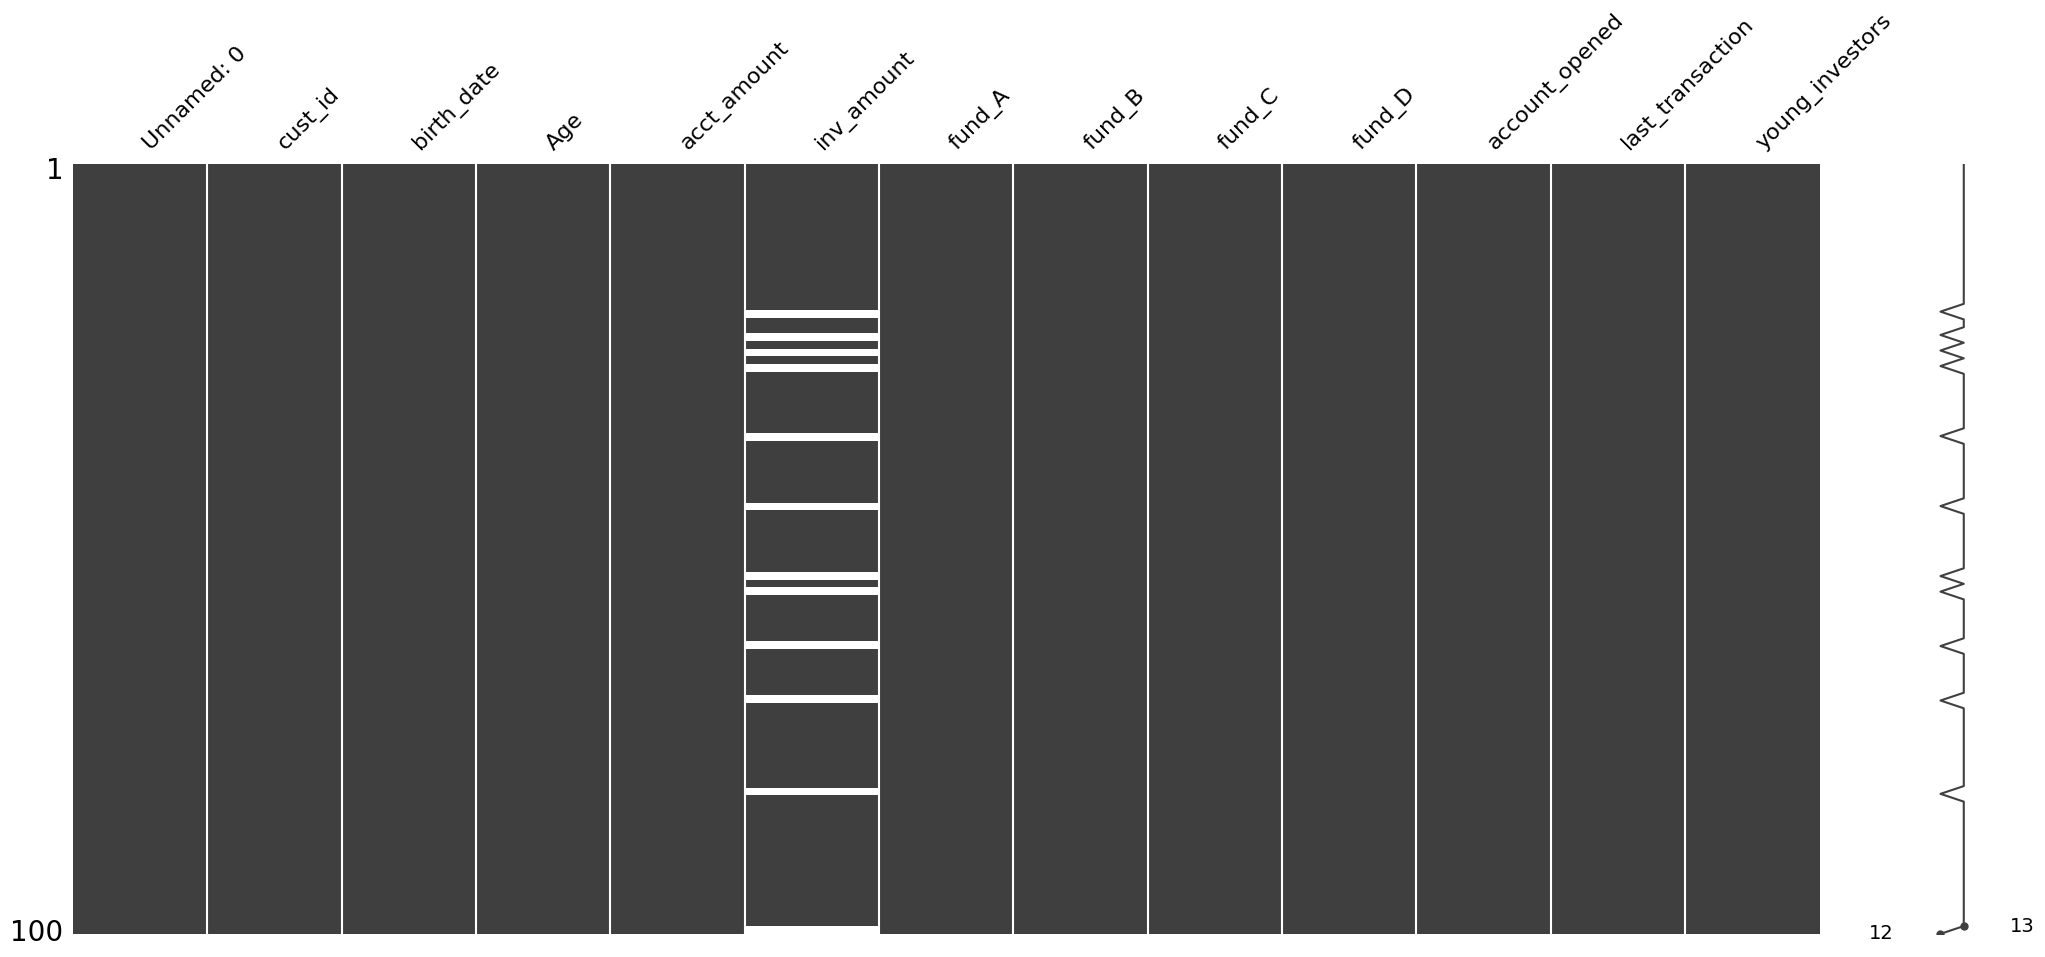

In [95]:
# pip install missingno
import pandas as pd
import missingno as msno
import matplotlib.pyplot as plt

# Print number of missing values in banking
print(banking.isna().sum())

# Visualize missingness matrix
msno.matrix(banking)
plt.show()

# Isolate missing and non missing values of inv_amount
missing_investors = banking[banking['inv_amount'].isna()]
investors = banking[~banking['inv_amount'].isna()]

,Unnamed: 0,Age,acct_amount,inv_amount,fund_A,fund_B,fund_C,fund_D
count,12.000000,12.000000,12.000000,0.0,12.00000,12.000000,12.000000,12.000000
mean,49.083333,28.000000,70941.570833,NaN,8479.50000,13352.083333,7850.050000,9005.250000
std,25.493166,0.738549,26057.218820,NaN,9023.08445,8228.299675,7597.935372,9665.917189
min,19.000000,27.000000,26585.870000,NaN,627.00000,1044.000000,958.000000,1004.000000
25%,25.500000,27.750000,58871.305000,NaN,2652.00000,7666.750000,2186.000000,4044.750000
50%,48.500000,28.000000,78064.995000,NaN,4773.00000,12676.500000,5517.800000,5447.500000
75%,63.750000,28.250000,89313.407500,NaN,9788.75000,17705.750000,12225.250000,8086.750000
max,99.000000,29.000000,99490.610000,NaN,27172.00000,30304.000000,26767.000000,33493.000000


,Unnamed: 0,Age,acct_amount,inv_amount,fund_A,fund_B,fund_C,fund_D
count,88.000000,88.000000,8.800000e+01,88.000000,88.000000,88.000000,88.000000,88.000000
mean,49.556818,45.238636,3.430735e+06,47016.215909,11882.417727,11616.140114,12454.357727,11239.654205
std,29.589862,8.967367,2.241591e+07,27247.956487,12813.077053,11437.153275,14692.095550,9486.920562
min,0.000000,30.000000,1.220984e+04,3214.000000,41.000000,312.000000,67.000000,118.000000
25%,24.500000,37.000000,5.921813e+04,23524.250000,2317.000000,2934.500000,2272.250000,4055.500000
50%,49.500000,46.000000,8.388040e+04,47954.500000,7224.500000,7652.000000,8402.500000,9369.000000
75%,75.250000,52.000000,9.509747e+04,68086.500000,16284.750000,17082.000000,15651.500000,16163.000000
max,98.000000,63.000000,1.737431e+08,96614.000000,58179.000000,51281.000000,75499.000000,51708.000000


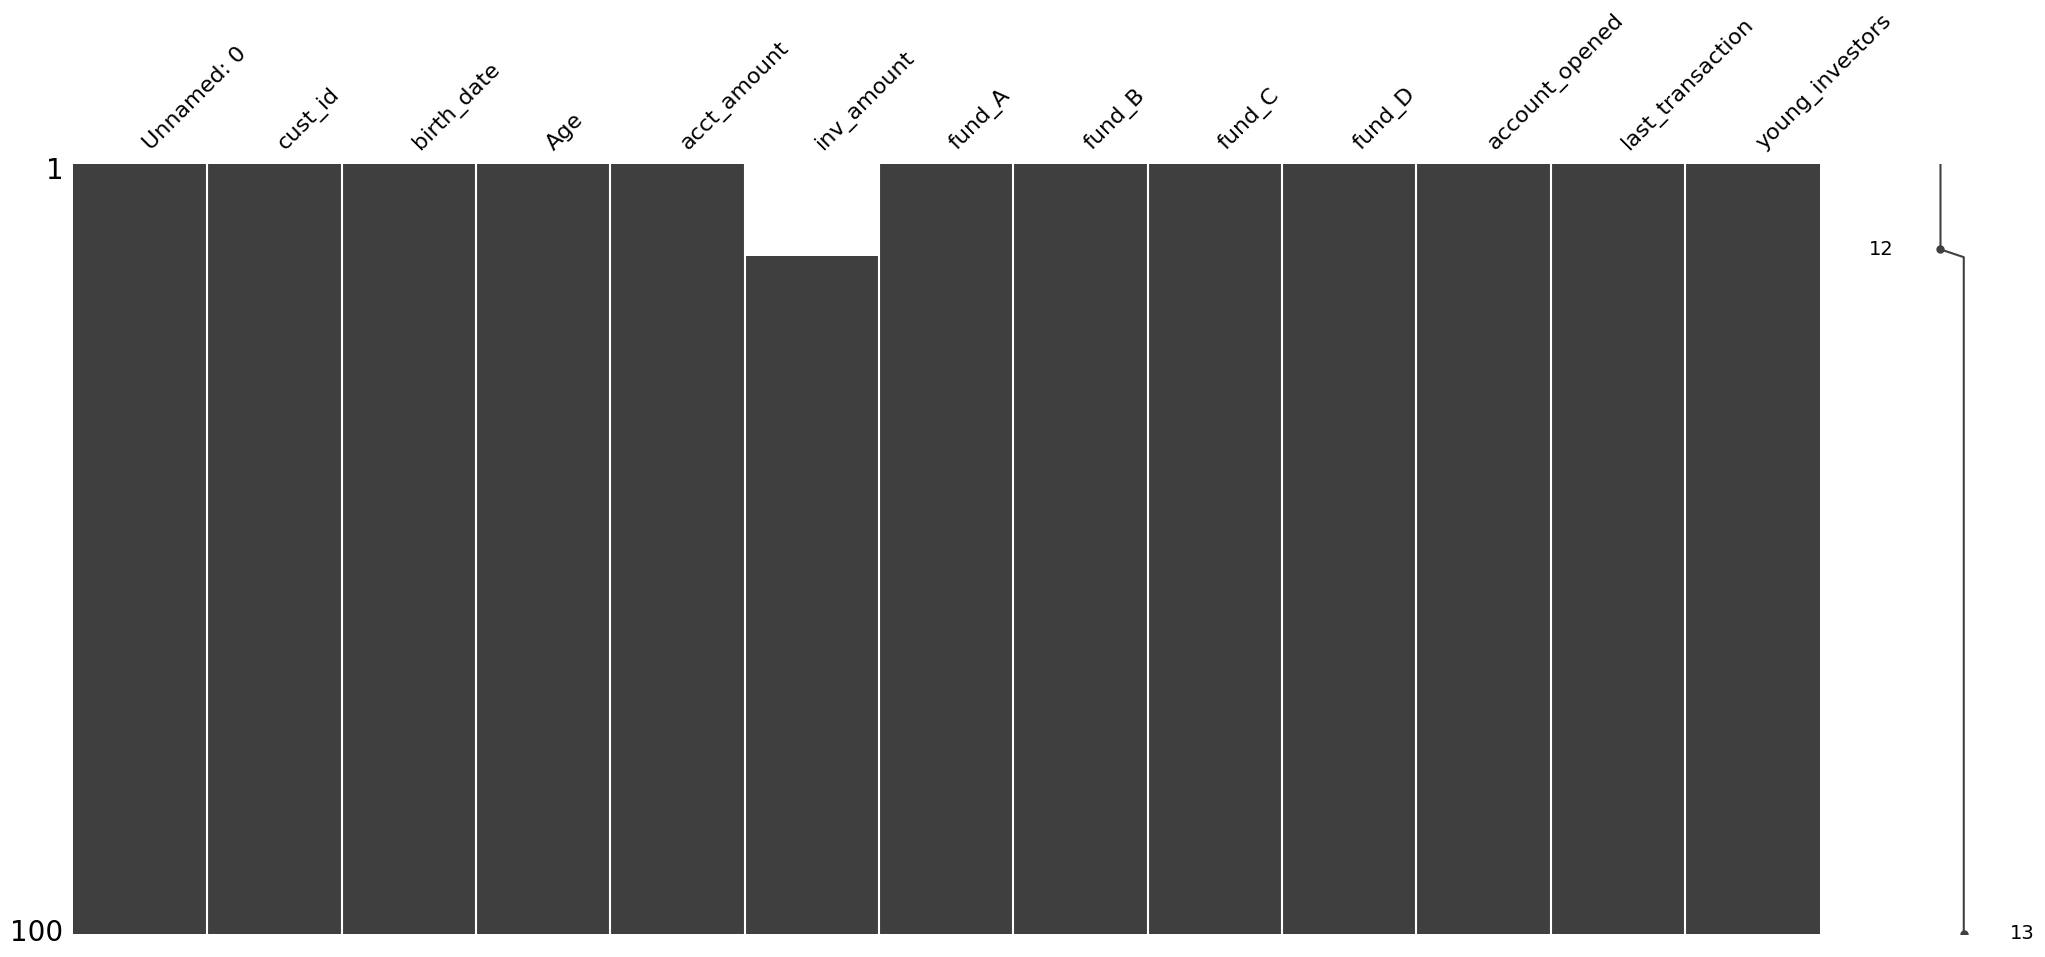

In [98]:
display(missing_investors.describe(), investors.describe())

# The inv_amount is missing only for young customers, since the 
# average age in missing_investors is 22 and the maximum age is 25.

# Sort banking by age and visualize
banking_sorted = banking.sort_values(by = 'Age')
msno.matrix(banking_sorted)
plt.show()

**Follow the money**

In this exercise, you're working with another version of the `banking` DataFrame that contains missing values for both the `cust_id` column and the `acct_amount` column.

You want to produce analysis on how many unique customers the bank has, the average amount held by customers and more. You know that rows with missing `cust_id` don't really help you, and that on average `acct_amount` is usually 5 times the amount of `inv_amount`.

In this exercise, you will drop rows of banking with missing `cust_ids`, and impute missing values of `acct_amount` with some domain knowledge.

STEPS
    Use .dropna() to drop missing values of the cust_id column in banking and store the results in banking_fullid.
    Use inv_amount to compute the estimated account amounts for banking_fullid by setting the amounts equal to inv_amount * 5, and assign the results to acct_imp.
    Impute the missing values of acct_amount in banking_fullid with the newly created acct_imp using .fillna().

In [104]:
# Drop missing values of cust_id
banking_fullid = banking.dropna(subset = ['cust_id'])

# Compute estimated acct_amount
acct_imp = banking_fullid['inv_amount'] * 5

# Impute missing acct_amount with corresponding acct_imp
banking_imputed = banking_fullid.fillna({'acct_amount':acct_imp})

# Compute estimated inv_amount
inv_imp = banking_fullid['inv_amount'].mean()

# Impute missing inv_amount with corresponding avg(inv_amount)
banking_imputed = banking_fullid.fillna({'inv_amount':inv_imp})

# Print number of missing values
print(banking_imputed.isna().sum())

Unnamed: 0          0
cust_id             0
birth_date          0
Age                 0
acct_amount         0
inv_amount          0
fund_A              0
fund_B              0
fund_C              0
fund_D              0
account_opened      0
last_transaction    0
young_investors     0
dtype: int64


## **Record linkage (Module 04-050)**

#### **Comparing strings**

1. Minimum edit distance
Least possible amount of steps needed to transition from one string to another

- Insertion : Insertion of a new character.
- Deletion : Deletion of an existing character.
- Substitution : Substitution of an existing character.
- Transposition : Transposition of two existing consecutive characters.

2. Minimum edit distance algorithms

Algorithm               Operations
Damerau-Levenshtein     insertion, substitution, deletion, transposition
Levenshtein             insertion, substitution, deletion
Hamming                 substitution only
Jaro distance           transposition only
...                     ...
*Possible packages:* nltk , thefuzz , textdistance ..

**Possible packages: thefuzz**
Levenshtein insertion, substitution, deletion 

3. Simple string comparison
*-# Lets us compare between two strings*
from thefuzz import fuzz
*-# Compare reeding vs reading*
fuzz.WRatio('Reeding', 'Reading')
86

4. Partial strings and different orderings
*-# Partial string comparison*
fuzz.WRatio('Houston Rockets', 'Rockets')

`90`

*-# Partial string comparison with different order*
fuzz.WRatio('Houston Rockets vs Los Angeles Lakers', 'Lakers vs Rockets')

`86`

5. Comparison with arrays
*-# Import process*
from thefuzz import process

*-# Define string and array of possible matches*
string = "Houston Rockets vs Los Angeles Lakers"
choices = pd.Series(['Rockets vs Lakers', 'Lakers vs Rockets',
                    Houson vs Los Angeles', 'Heat vs Bulls'])

process.extract(string, choices, limit = 2)

`[('Rockets vs Lakers', 86, 0), ('Lakers vs Rockets', 86, 1)]`

6. Collapsing categories with string similarity

*Chapter 2*
Use .replace() to collapse "eur" into "Europe"

*What if there are too many variations?*
"EU" , "eur" , "Europ" , "Europa" , "Erope" , "Evropa" ...
**String similarity!**

7. Collapsing categories with string matching
print(survey['state'].unique())

id state
0 California
1 Cali
2 Calefornia
3 Calefornie
4 Californie
5 Calfornia
6 Calefernia
7 New York
8 New York City
...

categories

state
0 California
1 New York

8. Collapsing all of the state
*-# For each correct category*
for state in categories['state']:
    *-# Find potential matches in states with typoes*
    matches = process.extract(state, survey['state'], limit = survey.shape[0])
    *-# For each potential match match*
        for potential_match in matches:
        *-# If high similarity score*
            if potential_match[1] >= 80:
            *-# Replace typo with correct category*
            survey.loc[survey['state'] == potential_match[0], 'state'] = state

9. Record linkage

**The cutoff point**

In this exercise, and throughout this chapter, you'll be working with the `restaurants` DataFrame which has data on various restaurants. Your ultimate goal is to create a restaurant recommendation engine, but you need to first clean your data.

This version of `restaurants` has been collected from many sources, where the `cuisine_type` column is riddled with typos, and should contain only `italian`, `american` and `asian` cuisine types. There are so many unique categories that remapping them manually isn't scalable, and it's best to use string similarity instead.

Before doing so, you want to establish the cutoff point for the similarity score using the `thefuzz`'s `process.extract()` function by finding the similarity score of the most distant typo of each category.

STEP01
    Import process from thefuzz.
    Store the unique cuisine_types into unique_types.
    Calculate the similarity of 'asian', 'american', and 'italian' to all possible cuisine_types using process.extract(), while returning all possible matches.
STEP02

In [107]:
restaurants = read_csv_fun('datasets','restaurants_L2_dirty', dir)
restaurants_clean = read_csv_fun('datasets','restaurants_L2', dir)

display(restaurants.head(10))
display(restaurants_clean.head(10))

,Unnamed: 0,name,addr,city,phone,type
0,0,kokomo,6333 w. third st.,la,2139330773,american
1,1,feenix,8358 sunset blvd. west,hollywood,2138486677,american
2,2,parkway,510 s. arroyo pkwy .,pasadena,8187951001,californian
3,3,r-23,923 e. third st.,los angeles,2136877178,japanese
4,4,gumbo,6333 w. third st.,la,2139330358,cajun/creole
5,5,pink's,709 n. la brea ave.,la,2139314223,hot dogs
6,6,original,875 s. figueroa st. downtown,la,2136276879,diners
7,7,21 clubs,21 w. 52nd st.,new york,2125827200,american
8,8,langer's,704 s. alvarado st.,la,2134838050,delis
9,9,mo,7261 melrose ave.,la,2139355280,hamburgers


,Unnamed: 0,name,addr,city,phone,type
0,0,arnie morton's of chicago,435 s. la cienega blv .,los angeles,3102461501,american
1,1,art's delicatessen,12224 ventura blvd.,studio city,8187621221,american
2,2,campanile,624 s. la brea ave.,los angeles,2139381447,american
3,3,fenix,8358 sunset blvd. west,hollywood,2138486677,american
4,4,grill on the alley,9560 dayton way,los angeles,3102760615,american
5,5,restaurant katsu,1972 n. hillhurst ave.,los angeles,2136651891,asian
6,6,locanda veneta,3rd st.,los angeles,3102741893,italian
7,7,matsuhisa,129 n. la cienega blvd.,beverly hills,3106599639,asian
8,8,the palm,9001 santa monica blvd.,los angeles,3105508811,american
9,9,philippe's the original,1001 n. alameda st.,los angeles,2136283781,american


#### **xxxx**

1. xxx

2. xxx

3. xxx

4. xxx

#### **xxxx**

1. xxx

2. xxx

3. xxx

4. xxx

In [1]:
print('Perrenque!')

Perrenque!
